<h1>Chapter 04. Training Models</h1>

<h2>Linear Regression</h2>

<h3>The Normal Equation</h3>

In [1]:
import numpy as np


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

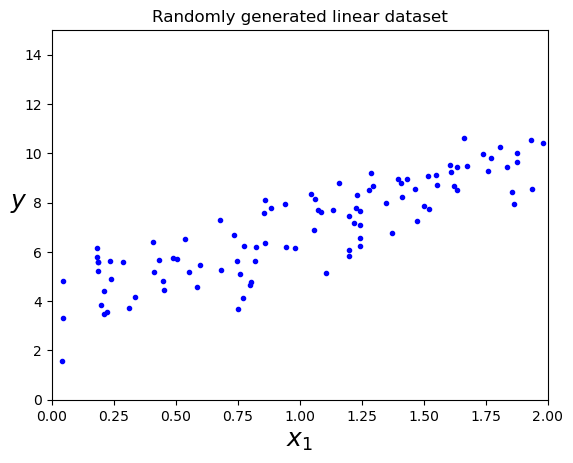

In [4]:
import matplotlib.pyplot as plt


plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('Randomly generated linear dataset')
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.81611911],
       [3.10747305]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.81611911],
       [10.03106521]])

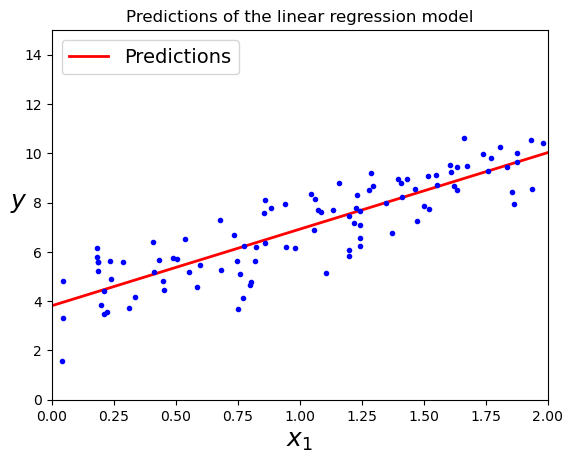

In [8]:
plt.plot(
    X_new,
    y_predict,
    'r-',
    linewidth=2,
    label='Predictions'
)
plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left', fontsize=14)
plt.title('Predictions of the linear regression model')
plt.show()

`LinearRegression` is an algorithm for modeling linear relationships between variables.

In [9]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate the intercept (bias) and coefficients for each feature in the linear model
lin_reg.intercept_, lin_reg.coef_

(array([3.81611911]), array([[3.10747305]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.81611911],
       [10.03106521]])

The `LinearRegression` class is based on the `numpy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.81611911],
       [3.10747305]])